In [196]:
import pandas
import psycopg2 as pg
import matplotlib.pyplot as plt
from datetime import timedelta, date

# connect to database
conn = pg.connect(database="PC_PARTS", user="pcadmin", password="adminpass", host="127.0.0.1", port="5432")

# read all products into data frama
data = pandas.read_sql('SELECT * FROM products', conn)

# close connection
conn.close()

In [88]:
# cik vispār unikālu produktu ir katrā no veikaliem (pa CPU, GPU, RAM)
productCount1A = data[data.shop == '1A'].product_id.nunique()
productCountDateks = data[data.shop == 'dateks'].product_id.nunique()
productCount220 = data[data.shop == '220'].product_id.nunique()
plt.style.use('seaborn-poster')


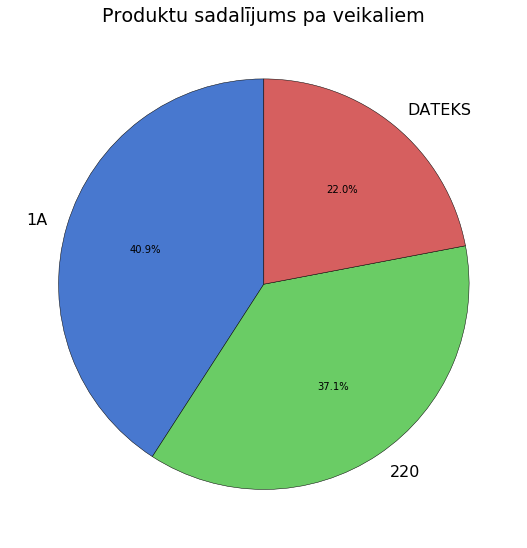

In [95]:
slices = [productCount1A, productCount220, productCountDateks]
labels = ['1A', '220', 'DATEKS' ]
plt.title("Produktu sadalījums pa veikaliem")
plt.pie(slices, labels=labels, startangle=90, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.show()

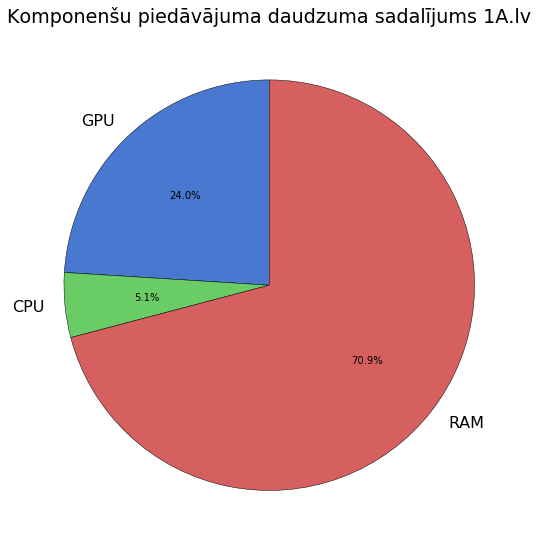

In [119]:
gpuCount = data[(data.category == 'GPU') & (data.shop == '1A')].product_id.nunique()
cpuCount = data[(data.category == 'CPU') & (data.shop == '1A')].product_id.nunique()
ramCount = data[(data.category == 'RAM') & (data.shop == '1A')].product_id.nunique()

slices = [gpuCount, cpuCount, ramCount]
labels = ['GPU', 'CPU', 'RAM' ]
plt.title("Komponenšu piedāvājuma daudzuma sadalījums 1A.lv")
plt.pie(slices, labels=labels, startangle=90, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.show()

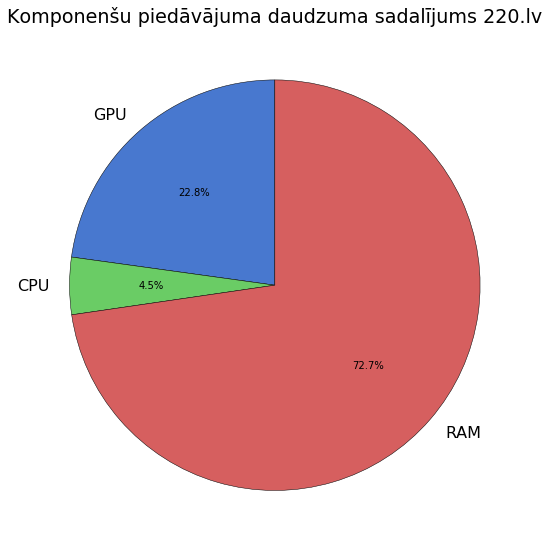

In [120]:
gpuCount = data[(data.category == 'GPU') & (data.shop == '220')].product_id.nunique()
cpuCount = data[(data.category == 'CPU') & (data.shop == '220')].product_id.nunique()
ramCount = data[(data.category == 'RAM') & (data.shop == '220')].product_id.nunique()

slices = [gpuCount, cpuCount, ramCount]
labels = ['GPU', 'CPU', 'RAM' ]
plt.title("Komponenšu piedāvājuma daudzuma sadalījums 220.lv")
plt.pie(slices, labels=labels, startangle=90, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.show()

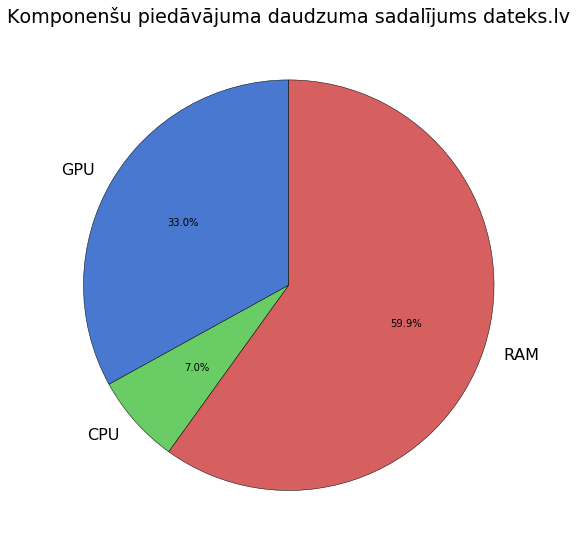

In [121]:
gpuCount = data[(data.category == 'GPU') & (data.shop == 'dateks')].product_id.nunique()
cpuCount = data[(data.category == 'CPU') & (data.shop == 'dateks')].product_id.nunique()
ramCount = data[(data.category == 'RAM') & (data.shop == 'dateks')].product_id.nunique()

slices = [gpuCount, cpuCount, ramCount]
labels = ['GPU', 'CPU', 'RAM' ]
plt.title("Komponenšu piedāvājuma daudzuma sadalījums dateks.lv")
plt.pie(slices, labels=labels, startangle=90, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.show()

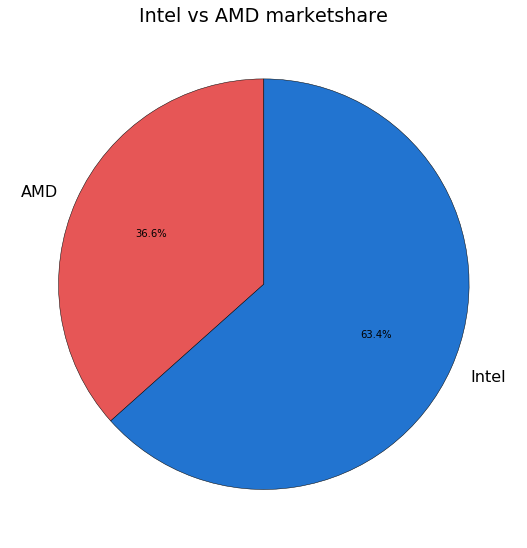

In [139]:
# INTEL vs AMD
amdCount = data[(data.category == 'CPU') & (data.name.str.contains("AMD"))].product_id.nunique()
intelCount = data[(data.category == 'CPU') & (data.name.str.contains("Intel"))].product_id.nunique()

slices = [amdCount, intelCount]
labels = ['AMD', 'Intel']
plt.title("Intel vs AMD marketshare")
colors = ['#e65656', '#2274d0']
plt.pie(slices, labels=labels, startangle=90, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%', colors=colors)
plt.show()

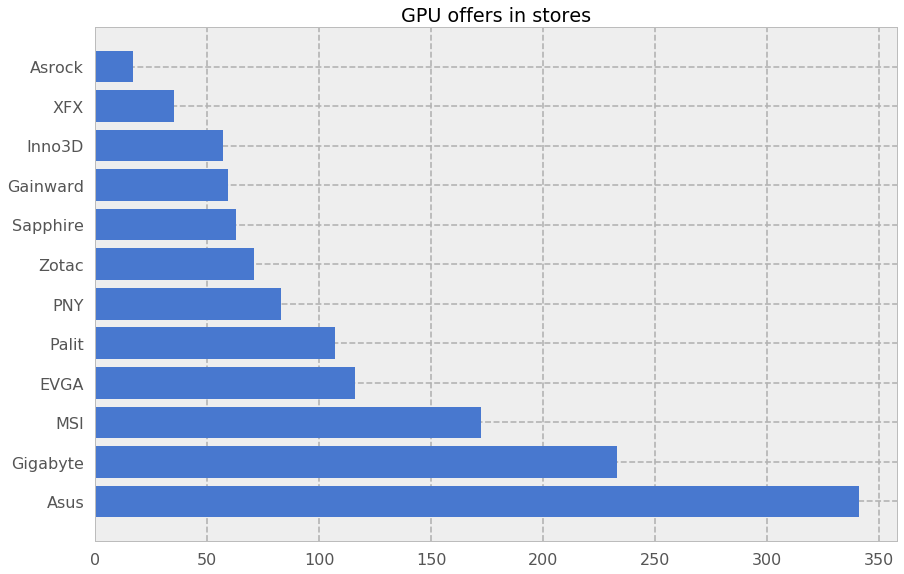

In [296]:
# GPU brands
asrockCount = data[(data.category == 'GPU') & (data.name.str.contains("ASRock"))].product_id.nunique()
asusCount = data[(data.category == 'GPU') & (data.name.str.contains("Asus"))].product_id.nunique()
evgaCount = data[(data.category == 'GPU') & (data.name.str.contains("EVGA"))].product_id.nunique()
gainwardCount = data[(data.category == 'GPU') & (data.name.str.contains("Gainward"))].product_id.nunique()
gigabyteCount = data[(data.category == 'GPU') & (data.name.str.contains("Gigabyte"))].product_id.nunique()
inno3dCount = data[(data.category == 'GPU') & (data.name.str.contains("Inno3D"))].product_id.nunique()
msiCount = data[(data.category == 'GPU') & (data.name.str.contains("MSI"))].product_id.nunique()
palitCount = data[(data.category == 'GPU') & (data.name.str.contains("Palit"))].product_id.nunique()
pnyCount = data[(data.category == 'GPU') & (data.name.str.contains("PNY"))].product_id.nunique()
sapphireCount = data[(data.category == 'GPU') & (data.name.str.contains("Sapphire"))].product_id.nunique()
xfxCount = data[(data.category == 'GPU') & (data.name.str.contains("XFX"))].product_id.nunique()
zotacCount = data[(data.category == 'GPU') & (data.name.str.contains("Zotac"))].product_id.nunique()

# very advanced sorting
slices_unsorted = {"Asrock": asrockCount, "Asus": asusCount, "EVGA": evgaCount, "Gainward": gainwardCount,
                    "Gigabyte": gigabyteCount, "Inno3D": inno3dCount, "MSI": msiCount, "Palit": palitCount, "PNY": pnyCount,
                    "Sapphire": sapphireCount, "XFX": xfxCount, "Zotac": zotacCount}
slices = sorted(slices_unsorted.values(), reverse=True)
labels = []
for p in slices:
    for key, val in slices_unsorted.items():
        if p == val:
            labels.append(key)
            break
            

plt.title("GPU offers in stores")
plt.barh(labels, slices)
plt.show()

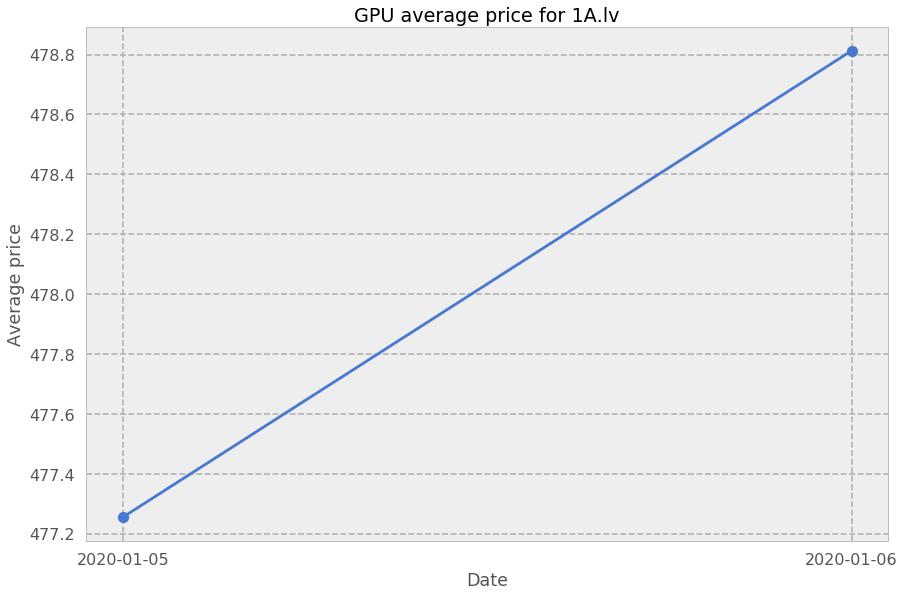

In [297]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

average_prices = {}
for single_date in daterange(date.today() - timedelta(7), date.today()): # range one week
    prices = data[(data.category == 'GPU') & (data.shop == '1A') & (data.date == single_date)].price # get price data for all GPUs for that day
    if prices.size == 0:
        continue
    average_prices[single_date.strftime("%Y-%m-%d")] = prices.mean() 

slices = list(average_prices.values())
labels = list(average_prices.keys())
            
plt.plot(labels, slices, marker='o')
plt.title('GPU average price for 1A.lv')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


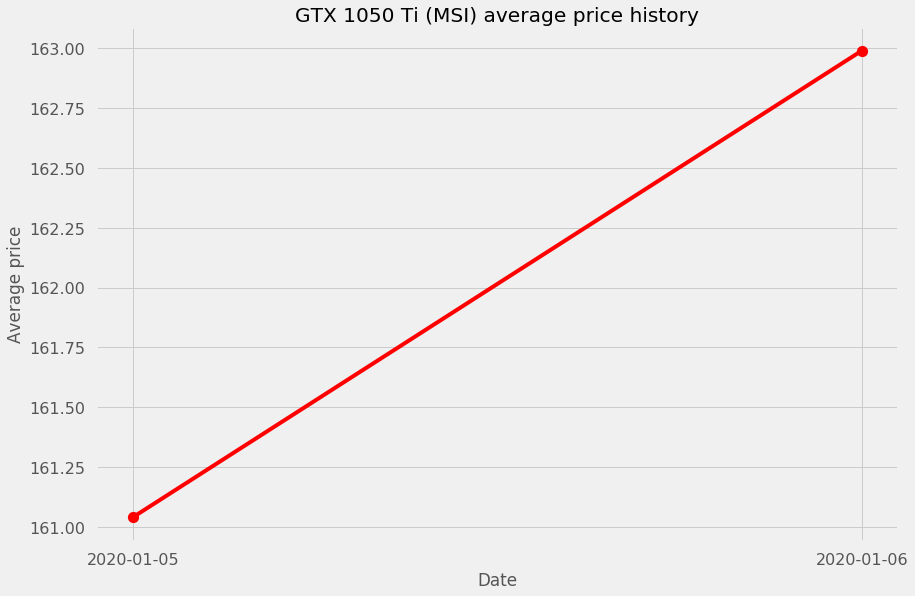

In [331]:
# average price history for GTX 1050 Ti (MSI)

average_prices = {}
for single_date in daterange(date.today() - timedelta(7), date.today()): # range one week
    gpu_prices = data[(data.category == 'GPU') & (data.shop == '1A') & (data.name.str.contains("GTX 1050 Ti")) & (data.name.str.contains("MSI")) & (data.date == single_date)].price # get price data
    if gpu_prices.size == 0:
        continue
    average_prices[single_date.strftime("%Y-%m-%d")] = gpu_prices.mean() 

slices = list(average_prices.values())
labels = list(average_prices.keys())

plt.style.use('fivethirtyeight')            
plt.plot(labels, slices, color="red", marker='o')
plt.title('GTX 1050 Ti (MSI) average price history')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()